In [ ]:
# Mounting the Google Colab Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Libraries:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importing the Customer Churn Analysis Dataset:

In [ ]:
cc=pd.read_csv('/content/drive/My Drive/DS Datasets/DT Project Datasets/Customer Churn Analysis.csv')

Identification of data types:

In [ ]:
cc.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

Size of the dataset:

In [ ]:
cc.shape

(3333, 21)

Statistical Summary of Numberic Variables

In [ ]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [ ]:
cc.describe

<bound method NDFrame.describe of      state  account length  ...  customer service calls  churn
0       KS             128  ...                       1  False
1       OH             107  ...                       1  False
2       NJ             137  ...                       0  False
3       OH              84  ...                       2  False
4       OK              75  ...                       3  False
...    ...             ...  ...                     ...    ...
3328    AZ             192  ...                       2  False
3329    WV              68  ...                       3  False
3330    RI              28  ...                       2  False
3331    CT             184  ...                       2  False
3332    TN              74  ...                       0  False

[3333 rows x 21 columns]>

Non-Graphical Univariate Analysis:

In [ ]:
#To get the count of unique values:

cc['state'].value_counts()

WV    106
MN     84
NY     83
AL     80
OH     78
OR     78
WI     78
VA     77
WY     77
CT     74
MI     73
ID     73
VT     73
UT     72
TX     72
IN     71
KS     70
MD     70
NJ     68
NC     68
MT     68
NV     66
CO     66
WA     66
MA     65
RI     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ND     62
ME     62
OK     61
DE     61
NE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

In [ ]:
#Finding null values

print(cc.isnull().sum(axis = 0))

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


Graphical Univariate Analysis:

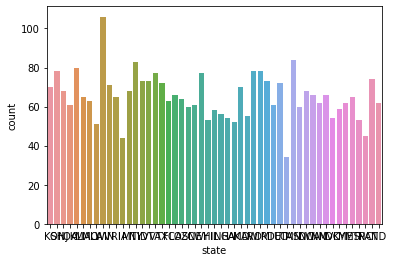

In [ ]:
#CountPlot

sns.countplot(cc.state)

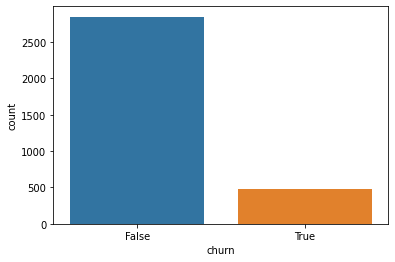

In [ ]:
#CountPlot

sns.countplot(cc.churn)

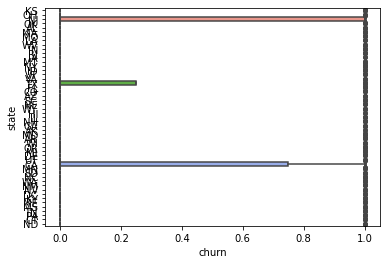

In [ ]:
#BoxPlot
#checking for outliers present in the dataset if any

sns.boxplot(x=cc['churn'],y=cc['state'])

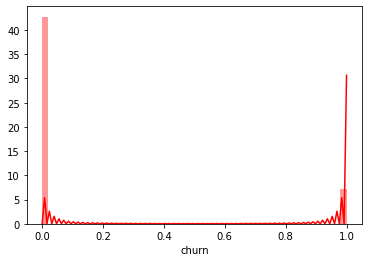

In [ ]:
#DistPlot
sns.distplot(cc[pd.notnull(cc.churn)]['churn'],color='red')

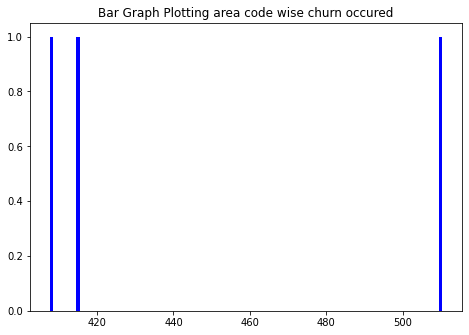

In [ ]:
#Bar Graph

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(cc['area code'],cc['churn'], color = 'b')
plt.title('Bar Graph Plotting area code wise churn occured')
plt.show()

In [ ]:
#checking for correaltion between variables

cc[['area code','churn']].corr()

,area code,churn
area code,1.000000,0.006174
churn,0.006174,1.000000


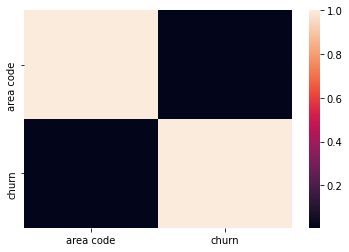

In [ ]:
#Checking correlation using Heatmap

sns.heatmap(cc[['area code','churn']].corr())

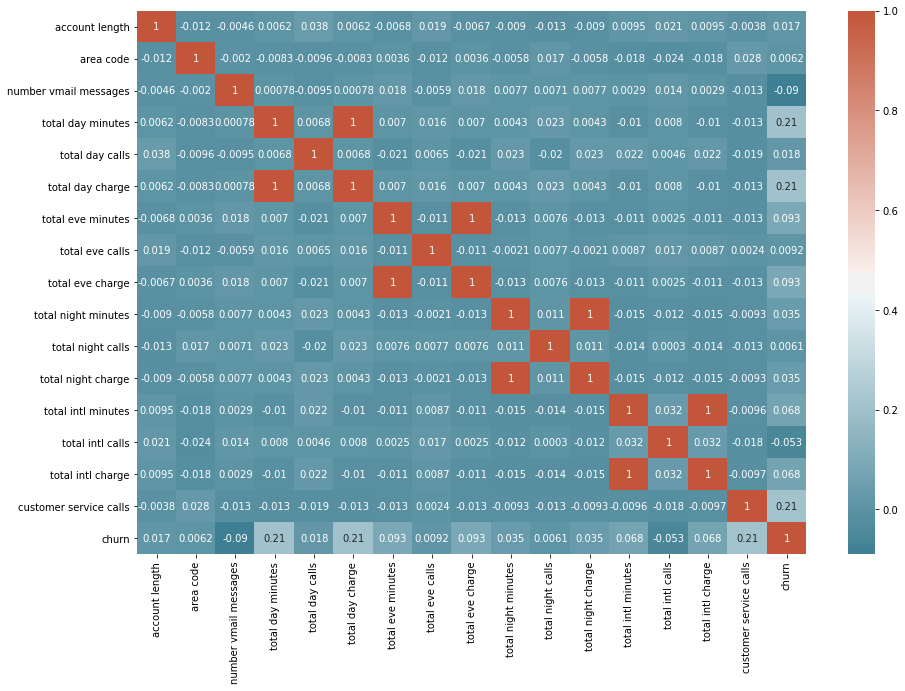

In [ ]:
corr = cc.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [ ]:
#Find Avgerage churn state-wise

cc.groupby('state')['churn'].mean()

state
AK    0.057692
AL    0.100000
AR    0.200000
AZ    0.062500
CA    0.264706
CO    0.136364
CT    0.162162
DC    0.092593
DE    0.147541
FL    0.126984
GA    0.148148
HI    0.056604
IA    0.068182
ID    0.123288
IL    0.086207
IN    0.126761
KS    0.185714
KY    0.135593
LA    0.078431
MA    0.169231
MD    0.242857
ME    0.209677
MI    0.219178
MN    0.178571
MO    0.111111
MS    0.215385
MT    0.205882
NC    0.161765
ND    0.096774
NE    0.081967
NH    0.160714
NJ    0.264706
NM    0.096774
NV    0.212121
NY    0.180723
OH    0.128205
OK    0.147541
OR    0.141026
PA    0.177778
RI    0.092308
SC    0.233333
SD    0.133333
TN    0.094340
TX    0.250000
UT    0.138889
VA    0.064935
VT    0.109589
WA    0.212121
WI    0.089744
WV    0.094340
WY    0.116883
Name: churn, dtype: float64

In [ ]:
#Find Avgerage total day charge state-wise

cc.groupby('state')['total day charge'].mean()

state
AK    30.325769
AL    31.621500
AR    29.940000
AZ    29.173125
CA    31.206176
CO    30.381818
CT    29.774324
DC    29.135370
DE    29.680164
FL    30.521429
GA    31.455185
HI    29.913019
IA    30.195455
ID    30.365753
IL    29.511552
IN    33.410000
KS    32.565143
KY    29.539153
LA    30.324706
MA    30.617538
MD    33.529571
ME    31.495806
MI    30.700959
MN    31.170952
MO    28.987302
MS    30.248462
MT    29.581618
NC    31.475294
ND    31.848548
NE    30.169344
NH    30.146250
NJ    33.358676
NM    29.142903
NV    29.992879
NY    29.770361
OH    31.157564
OK    30.584754
OR    29.962821
PA    32.024444
RI    28.472154
SC    28.295833
SD    32.247667
TN    29.881698
TX    30.858472
UT    31.207222
VA    30.131688
VT    30.946301
WA    30.386667
WI    30.452308
WV    29.572358
WY    30.628961
Name: total day charge, dtype: float64

In [ ]:
#Find Avgerage total night charge area code-wise

cc.groupby('area code')['total night charge'].mean()

area code
408    8.964785
415    9.091795
510    9.010310
Name: total night charge, dtype: float64

In [ ]:
#Find Avgerage total intl charge area code-wise

cc.groupby('area code')['total intl charge'].mean()

area code
408    2.734737
415    2.793257
510    2.737857
Name: total intl charge, dtype: float64

In [ ]:
#Checking the skewness

cc.skew()

account length            0.096606
area code                 1.126823
number vmail messages     1.264824
total day minutes        -0.029077
total day calls          -0.111787
total day charge         -0.029083
total eve minutes        -0.023877
total eve calls          -0.055563
total eve charge         -0.023858
total night minutes       0.008921
total night calls         0.032500
total night charge        0.008886
total intl minutes       -0.245136
total intl calls          1.321478
total intl charge        -0.245287
customer service calls    1.091359
churn                     2.018356
dtype: float64

In [ ]:
#using label encoding and one-hot encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cc['area code'] = le.fit_transform(cc['area code'])
cc['churn'] = le.fit_transform(cc['churn'])
cc.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,1,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,1,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,1,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,0,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,1,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [ ]:
#dummifying data required for spliting the data

cc = pd.get_dummies(cc)
cc.head(5)

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,...,phone number_421-2955,phone number_421-3226,phone number_421-3528,phone number_421-5994,phone number_421-6268,phone number_421-6694,phone number_421-7205,phone number_421-7214,phone number_421-7270,phone number_421-8141,phone number_421-8535,phone number_421-8537,phone number_421-9034,phone number_421-9144,phone number_421-9401,phone number_421-9752,phone number_421-9846,phone number_422-1471,phone number_422-1799,phone number_422-2571,phone number_422-3052,phone number_422-3454,phone number_422-4241,phone number_422-4394,phone number_422-4956,phone number_422-5264,phone number_422-5350,phone number_422-5865,phone number_422-5874,phone number_422-6685,phone number_422-6690,phone number_422-7728,phone number_422-8268,phone number_422-8333,phone number_422-8344,phone number_422-9964,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,128,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,107,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,137,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,84,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,75,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [ ]:
#spliting the data

from sklearn.model_selection import train_test_split

y = cc['churn']
X = cc

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [ ]:
#Using Decision Tree Model

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train, y_train)
y_pred1 = dtree.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       719
           1       1.00      1.00      1.00       115

    accuracy                           1.00       834
   macro avg       1.00      1.00      1.00       834
weighted avg       1.00      1.00      1.00       834



In [ ]:
#Applying Random Forest Model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
y_pred2 = rf.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       719
           1       1.00      0.97      0.98       115

    accuracy                           1.00       834
   macro avg       1.00      0.98      0.99       834
weighted avg       1.00      1.00      1.00       834



In [ ]:
# Function to calculate mean absolute error

def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_prediction = model.predict(X_test)
    model_crossV = cross_val(X_train, y_train, model)
    
    # Return the performance metric
    return model_crossV

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier,XGBRFClassifier
from sklearn import model_selection

In [ ]:
dtree=DecisionTreeClassifier(criterion="entropy")
dtreeg=DecisionTreeClassifier(criterion='gini')
knn=KNeighborsClassifier()
gb=GaussianNB()
rfc=RandomForestClassifier(criterion='entropy')
rfcg=RandomForestClassifier(criterion='gini')
bgc=BaggingClassifier()
adb=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
xgb=XGBClassifier()
xgbrf=XGBRFClassifier()

In [ ]:
models = []
models.append(('Decision Tree',dtree))
models.append(('Decision Tree with Gini Coefficient',dtreeg))
models.append(('K Nearest Neighbors',knn))
models.append(('Naive Bayes',gb))
models.append(('Random Forrest',rfc))
models.append(('Random Forrest with Gini Coefficient',rfcg))
models.append(('Bagging Classifier',bgc))
models.append(('Ada Boost Classifier',adb))
models.append(('Gradient Boosting Classifier',gbc))
models.append(('XGB Classifier',xgb))
models.append(('XGBRF Classifier',xgbrf))

Decision Tree: 1.000000 (0.000000)
Decision Tree with Gini Coefficient: 1.000000 (0.000000)
K Nearest Neighbors: 0.877270 (0.000563)
Naive Bayes: 1.000000 (0.000000)
Random Forrest: 0.993401 (0.000018)
Random Forrest with Gini Coefficient: 0.996400 (0.000012)
Bagging Classifier: 1.000000 (0.000000)
Ada Boost Classifier: 1.000000 (0.000000)
Gradient Boosting Classifier: 1.000000 (0.000000)
XGB Classifier: 1.000000 (0.000000)
XGBRF Classifier: 1.000000 (0.000000)


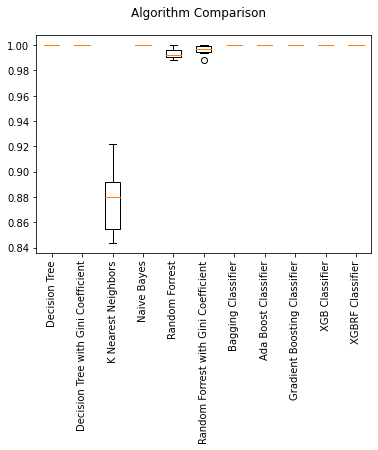

In [ ]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10,random_state=123)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.var())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xticks(rotation=90)
ax.set_xticklabels(names)
plt.show()

In [ ]:
#Saving the model as a pickle in a file

from sklearn.externals import joblib

joblib.dump(rfc,'CustomerChurnAnalysis.pkl')

['CustomerChurnAnalysis.pkl']